Escreva um código para aceitar a matriz da seguinte equação: du/dt = A u.

Em seguida, resolva a equação 1 analiticamente e 2 numericamente (FE).

Para a solução analítica, primeiro descubra se a matriz é defeituosa ou não. Em seguida, decida qual método usar para a solução.

1- Mostre que seu código está funcionando fornecendo dois exemplos (matrizes defeituosas e não defeituosas). As matrizes devem ser maiores que 3x3.

2- Trace resultados analíticos e numéricos.

3- Trace o erro.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Defining two matrices to use throughout the code: diagonalizable and non-diagonalizable** \
You can define any nxn matrix, just don't change the variable names


In [ ]:
correct_matrix = np.array([[1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 1], [1, 0, 1, 1]])   # diagonalizable matrix
incorrect_matrix = np.array([[1, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 1], [0, 0, 0, 1]])   # non-diagonalizable matrix

**Verifying the matrices:**

In [ ]:
def is_diagonalizable(matrix):
    try:
        eigvals, eigvecs = np.linalg.eig(matrix)
        return np.all(np.isreal(eigvals)) and np.linalg.matrix_rank(eigvecs) == matrix.shape[0]
    except np.linalg.LinAlgError:
        return False

In [ ]:
is_diagonalizable(correct_matrix)

True

In [ ]:
is_diagonalizable(incorrect_matrix)

False

**Solving du/dt=Au:**

In [ ]:
def analytical_solution(A, u_0, max_t, h):
    eigvals, eigvecs = np.linalg.eig(A)
    D = np.diag(eigvals)
    P = eigvecs
    T = [0+h]
    u = [u_0]
    while T[-1] < max_t+h:
        u.append(P @ np.diag(np.exp(eigvals * T[-1])) @ np.linalg.inv(P) @ u_0)
        T.append(T[-1]+h)
    return np.array(u)

In [ ]:
def forward_euler(A, u_0, max_t, h):
    T = [0]
    u = [u_0]
    while T[-1] < max_t:
        u.append(u[-1] + h * (A @ u[-1]))
        T.append(T[-1]+h)
    return np.array(u)

In [ ]:
def taylor_expansion(A, u_0, max_t, h, num_terms=50):
    print(f'Number of terms in the Taylor Expansion: {num_terms}')
    T = [0]
    u = [u_0]
    while T[-1] < max_t:
        result = np.array(u_0.copy(), dtype=float)
        for i in range(1, num_terms + 1):
            A_power_i = np.linalg.matrix_power(A, i)
            term = (T[-1] ** i) / np.math.factorial(i) * np.dot(A_power_i, u_0)
            result += term
        u.append(result)
        T.append(T[-1]+h)
    return np.array(u)

In [ ]:
def solve(A, u_0, max_t, h, num_terms_taylor=50):
    if is_diagonalizable(A):
        print('The matrix is diagonalizable')
        u_analytical = analytical_solution(A, u_0, max_t, h)
        u_numerical = forward_euler(A, u_0, max_t, h)
        error = abs(u_analytical - u_numerical)
        return u_analytical, u_numerical, error

    else:
        print('The matrix is non-diagonalizable')
        u_taylor = taylor_expansion(A, u_0, max_t, h, num_terms_taylor)
        u_numerical = forward_euler(A, u_0, max_t, h)
        error = abs(u_taylor - u_numerical)
        return u_taylor, u_numerical, error

Diagonalizable exemple

In [ ]:
A = correct_matrix
u_0 = np.array([1,1,1,1])
max_t = 1
h = 1e-3
num_terms_taylor = 10

u_analytical, u_numerical, error = solve(A, u_0, max_t, h, num_terms_taylor)
if is_diagonalizable(A):
    print(f'Analytical solution for t = {max_t}: {u_analytical[-1]}')
    print(f'Numerical solution for t = {max_t}: {u_numerical[-1]}')
    print(f'The absolute error was: {error[-1]}')

else:
    print(f'Analytical solution by Taylor Expansion for t = {max_t}: {u_analytical[-1]}')
    print(f'Numerical solution for t = {max_t}: {u_numerical[-1]}')
    print(f'The absolute error: {error[-1]}')

The matrix is diagonalizable
Analytical solution for t = 1: [10.67511007 25.35808164 21.45344776 17.4012534 ]
Numerical solution for t = 1: [10.63645799 25.25015977 21.35951098 17.33062571]
The absolute error was: [0.03865207 0.10792186 0.09393678 0.07062769]


Non-Diagonalizable exemple

In [ ]:
A = incorrect_matrix
u_0 = np.array([1,1,1,1])
max_t = 1
h = 1e-3
num_terms_taylor = 10

u_analytical, u_numerical, error = solve(A, u_0, max_t, h, num_terms_taylor)
if is_diagonalizable(A):
    print(f'Analytical solution for t = {max_t}: {u_analytical[-1]}')
    print(f'Numerical solution for t = {max_t}: {u_numerical[-1]}')
    print(f'The absolute error was: {error[-1]}')

else:
    print(f'Analytical solution by Taylor Expansion for t = {max_t}: {u_analytical[-1]}')
    print(f'Numerical solution for t = {max_t}: {u_numerical[-1]}')
    print(f'The absolute error: {error[-1]}')


The matrix is non-diagonalizable
Number of terms in the Taylor Expansion: 10
Analytical solution by Taylor Expansion for t = 1: [6.78348065 5.42841392 9.49632969 2.71556488]
Numerical solution for t = 1: [6.78552702 5.43113365 9.49973674 2.71692393]
The absolute error: [0.00204637 0.00271974 0.00340705 0.00135905]


**Graphs**

Diagonalizable matrix exemple

The matrix is diagonalizable


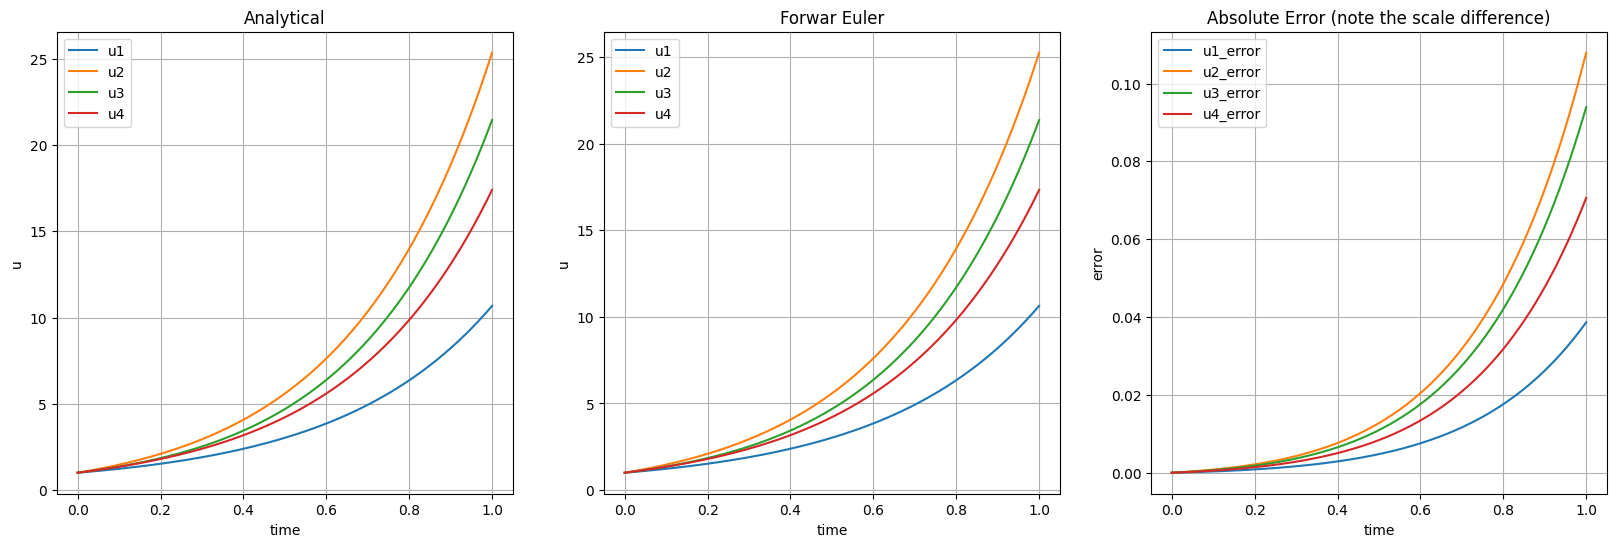

In [ ]:
A = correct_matrix
u_0 = np.array([1,1,1,1], dtype=float)
max_t = 1
h = 1e-3
num_terms_taylor = 5

u_analytical, u_numerical, error = solve(A, u_0, max_t, h, num_terms_taylor)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
vector_dim = len(u_0)

# creating the times list
T_list = [0]
while T_list[-1] < max_t:
    T_list.append(T_list[-1]+h)

# graph 1
axs[0].set_title('Analytical')
for i in range(vector_dim):
    axs[0].plot(T_list, u_analytical[:,i], label=f'u{i+1}')

# graph 2
axs[1].set_title('Forwar Euler')
for i in range(vector_dim):
    axs[1].plot(T_list, u_numerical[:,i], label=f'u{i+1}')

# graph 3
axs[2].set_title('Absolute Error (note the scale difference)')
for i in range(vector_dim):
    axs[2].plot(T_list, error[:,i], label=f'u{i+1}_error')

# graphs details
for ax in axs.flat:
    ax.legend()
    ax.grid()
    if not ax == axs.flat[-1]:
        ax.set(xlabel='time', ylabel='u')
    else:
        ax.set(xlabel='time', ylabel='error')

Non-Diagonalizable matrix exemple

The matrix is non-diagonalizable
Number of terms in the Taylor Expansion: 5


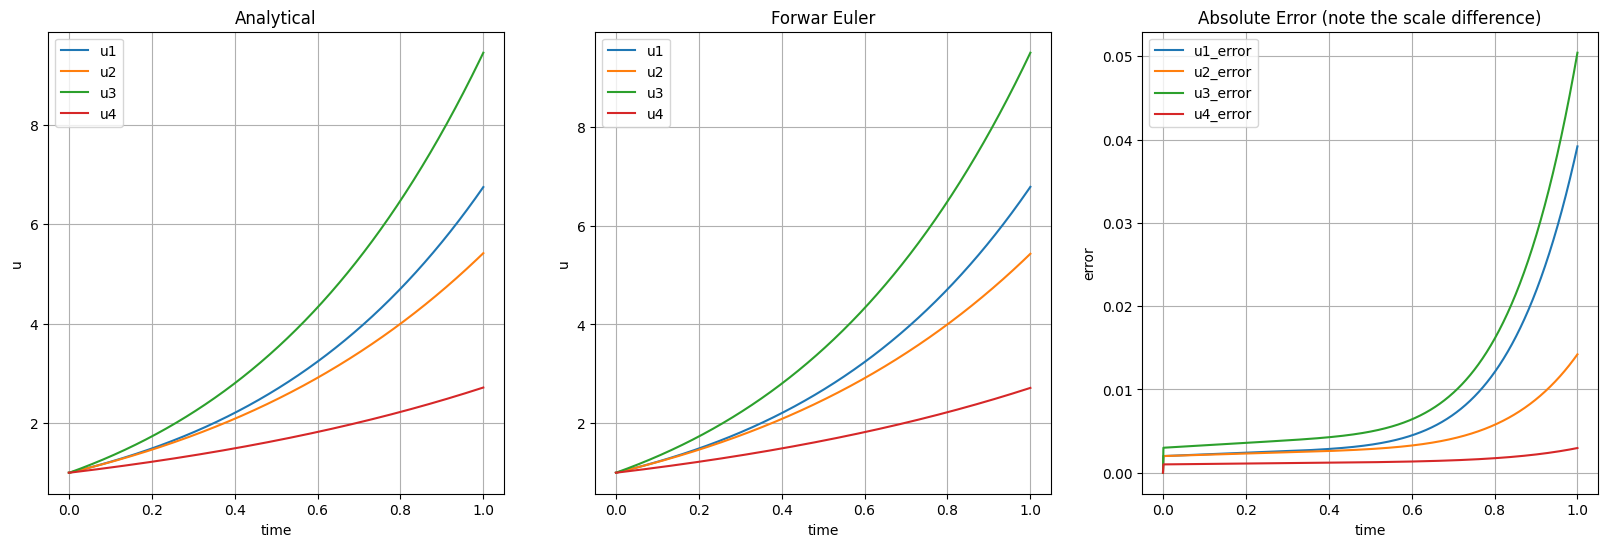

In [ ]:
A = incorrect_matrix
u_0 = np.array([1,1,1,1], dtype=float)
max_t = 1
h = 1e-3
num_terms_taylor = 5

u_analytical, u_numerical, error = solve(A, u_0, max_t, h, num_terms_taylor)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
vector_dim = len(u_0)

# creating the times list
T_list = [0]
while T_list[-1] < max_t:
    T_list.append(T_list[-1]+h)

# graph 1
axs[0].set_title('Analytical')
for i in range(vector_dim):
    axs[0].plot(T_list, u_analytical[:,i], label=f'u{i+1}')

# graph 2
axs[1].set_title('Forwar Euler')
for i in range(vector_dim):
    axs[1].plot(T_list, u_numerical[:,i], label=f'u{i+1}')

# graph 3
axs[2].set_title('Absolute Error (note the scale difference)')
for i in range(vector_dim):
    axs[2].plot(T_list, error[:,i], label=f'u{i+1}_error')

# graphs details
for ax in axs.flat:
    ax.legend()
    ax.grid()
    if not ax == axs.flat[-1]:
        ax.set(xlabel='time', ylabel='u')
    else:
        ax.set(xlabel='time', ylabel='error')